In [ ]:
!nvidia-smi

Fri Feb  2 18:31:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              33W /  70W |    205MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.1.0+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

Computer Vision work has a massive impact on companies across industries, from retail to security, healthcare, construction, automotive, manufacturing, logistics, and agriculture.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is when a model fits exactly to the training data, When this happen the model cannot accurately predict on unseen data.

3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

* **Early stopping**: this method seeks to pause training before the model starts learning the noise within the model. This approach risks halting the training process too soon, leading to the opposite problem of underfitting.

* **Feature selection:** Feature selection is the process of identifying the most important ones within the training data and then eliminating the irrelevant or redundant ones.

* **Regularization:** Regularization applies a “penalty” to the input parameters with the larger coefficients, which subsequently limits the amount of variance in the model.  While there are a number of regularization methods, such as lasso regularization, ridge regression and dropout, they all seek to identify and reduce the noise within the data.

## 4. Spend 20-minutes reading and clicking through the CNN Explainer website.

**DONE**

## 5. Load the torchvision.datasets.MNIST() train and test datasets.

In [ ]:
import torchvision
from torchvision.datasets import MNIST

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None

)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

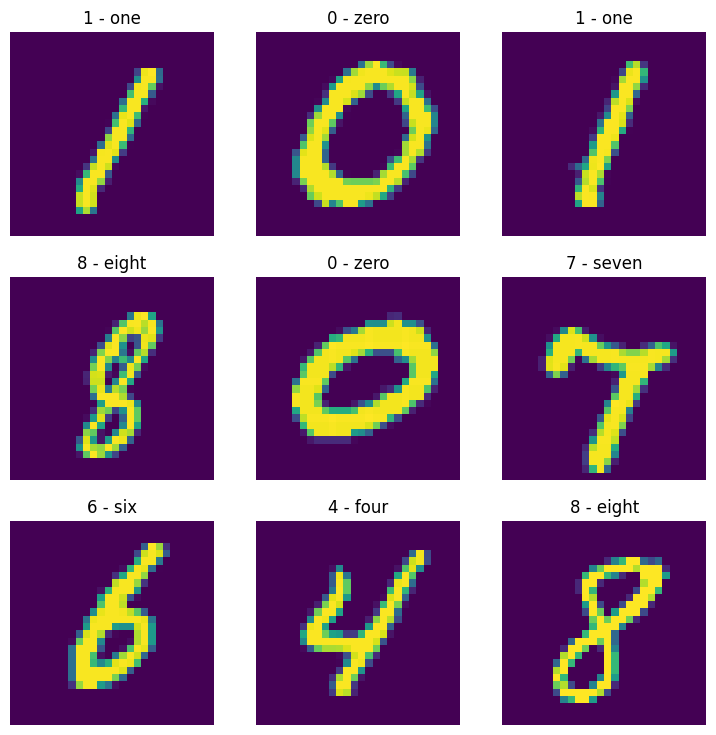

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
rows, cols = 3, 3

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze())
  plt.title(class_names[label])
  plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f14fc38b640>, <torch.utils.data.dataloader.DataLoader object at 0x7f14fc38bac0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


## 8. Recreate model_2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn
class MNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7,
            out_features=output_shape
        )
    )


  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)

    return x

In [ ]:
model_0 = MNISTModelV0(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_0

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download...")

else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_function.py already exists, skipping download...


In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer

def print_train_time(start, end, device):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return

In [ ]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device):

  """Performs training with model trying to learn on dataloader"""
  train_loss, train_acc = 0, 0

  model.train()
  for batch, (X, y) in enumerate(dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")



In [ ]:
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device):

  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y)
      test_acc = accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))


    # Adjust metrics and print out
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


In [ ]:
from tqdm import tqdm

start_train_time = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n--------------")
  train_step(
      model=model_0,
      dataloader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )

  test_step(
      model=model_0,
      dataloader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

end_train_time = timer()
total_train_time = print_train_time(
    start_train_time,
    end_train_time,
    device
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0
--------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.37760 | Train acc: 87.19%


 20%|██        | 1/5 [00:12<00:49, 12.31s/it]

Test loss: 0.00012 | Test acc: 0.32%
Epochs: 1
--------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.07093 | Train acc: 97.81%


 40%|████      | 2/5 [00:24<00:36, 12.07s/it]

Test loss: 0.00006 | Test acc: 0.32%
Epochs: 2
--------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.05479 | Train acc: 98.22%


 60%|██████    | 3/5 [00:36<00:24, 12.01s/it]

Test loss: 0.00000 | Test acc: 0.32%
Epochs: 3
--------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.04678 | Train acc: 98.49%


 80%|████████  | 4/5 [00:48<00:12, 12.10s/it]

Test loss: 0.00000 | Test acc: 0.32%
Epochs: 4
--------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.04075 | Train acc: 98.66%


100%|██████████| 5/5 [01:00<00:00, 12.12s/it]

Test loss: 0.00000 | Test acc: 0.32%
Train time on cuda: 60.627 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
def eval_model(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn, device):

  """Returns a dictionary containing the results of model predicting on dataloader."""
  loss, acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(dataloader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {
      "model_name": model.__class__.__name__,
      "model_loss": loss.item(),
      "model_acc": acc
  }



In [ ]:
model_1_results = eval_model(
    model=model_0,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_1_results

100%|██████████| 313/313 [00:01<00:00, 250.63it/s]


{'model_name': 'MNISTModelV0',
 'model_loss': 0.0471067801117897,
 'model_acc': 98.41253993610223}

In [ ]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device):

  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())


  # Stak the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)




In [ ]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=5):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
# Make predictions
pred_probs = make_predictions(
    model=model_0,
    data=test_samples,
)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.1797e-07, 7.1088e-08, 3.1236e-09, 3.6439e-06, 1.2340e-04, 3.2993e-06,
         4.8579e-11, 2.1155e-07, 7.0209e-06, 9.9986e-01],
        [3.8622e-10, 3.2746e-07, 8.6942e-07, 9.9998e-01, 2.2079e-10, 1.6971e-06,
         8.9790e-12, 3.6191e-09, 2.5316e-07, 1.5806e-05]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 3, 7, 4, 9])

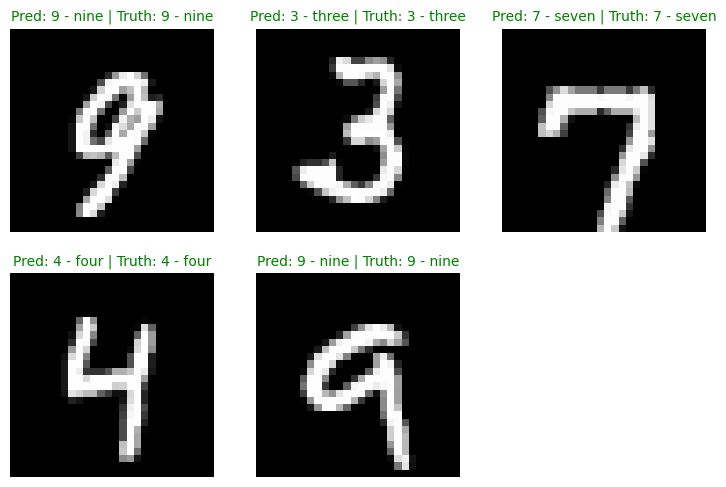

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_0.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):
    X, y = X.to(device), y.to(device)

    y_logits = model_0(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 4, 1, 8, 8, 8, 8], device='cuda:0')

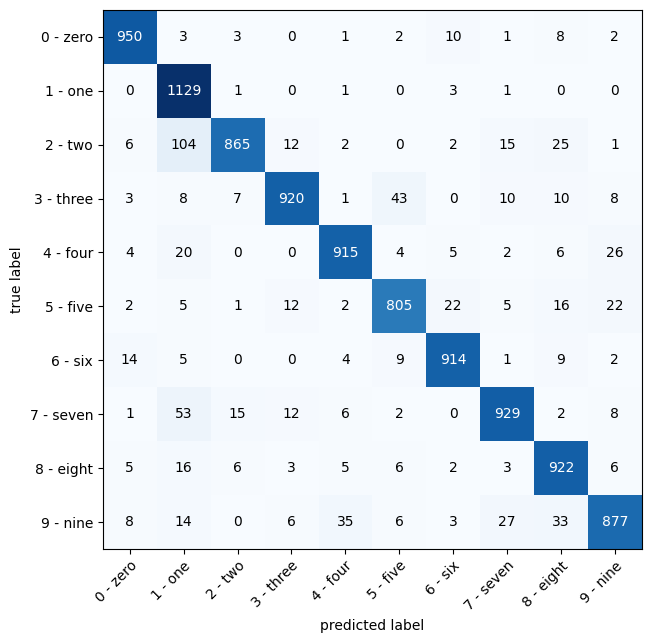

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor.cpu(), target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [ ]:
random_tensor = torch.randn(size=(1, 3, 64, 64))
test_tensor = random_tensor[0]

test_tensor


tensor([[[ 0.1727, -0.8520, -0.3210,  ...,  0.0523, -0.3934,  0.2001],
         [-0.5530, -0.2897, -0.2314,  ..., -2.1114,  0.4100, -0.4576],
         [-1.3188,  1.2207, -1.7170,  ...,  0.3519, -0.2876,  0.0934],
         ...,
         [ 1.6279,  0.8216, -0.1785,  ..., -0.0659,  0.5658, -0.1401],
         [-1.7100, -0.2608,  0.1187,  ...,  0.8869,  0.6387, -0.0475],
         [-0.3122,  1.0934,  1.0752,  ..., -0.4310, -0.6167, -1.9384]],

        [[ 0.8469,  0.4116, -2.6061,  ...,  0.8685,  0.8029,  1.2439],
         [ 2.1912,  0.6209,  0.4124,  ..., -0.1957,  1.3394,  1.5587],
         [ 0.8119,  1.2505, -2.4507,  ...,  2.3764, -0.1536, -0.5811],
         ...,
         [-0.1974,  0.4588,  0.0993,  ..., -0.0729, -0.7443, -0.3201],
         [-1.4716,  1.3948, -0.5260,  ...,  0.1712,  1.3242, -0.6113],
         [-1.5934, -1.3725,  1.7384,  ...,  0.9343, -1.4811, -0.4581]],

        [[ 0.9842, -0.7905, -0.9610,  ...,  0.7437,  1.2592,  0.7601],
         [-0.2930,  0.4314,  0.6923,  ...,  0

In [ ]:
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    padding=0,
    kernel_size=3,
    stride=1)

conv_output = conv_layer(test_tensor)
conv_output.shape

torch.Size([10, 62, 62])

## 13. Use a model similar to the trained model_2 from notebook 03 to make predictions on the test torchvision.datasets.FashionMNIST dataset.

In [ ]:
from torchvision.datasets import FashionMNIST
train_data = FashionMNIST(
    root="data",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
)

test_data = FashionMNIST(
    root="data",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
train_start = timer()
epochs = 5

for i in tqdm(range(epochs)):
  train_step(
      model=model_0,
      dataloader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device)

  test_step(
      model=model_0,
      dataloader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device)

train_end = timer()

print_train_time(
    train_start,
    train_end,
    device=device
)



  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.30731 | Train acc: 88.84%
Test loss: 0.00059 | Test acc: 0.30%
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.29284 | Train acc: 89.43%
Test loss: 0.00042 | Test acc: 0.30%
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.28898 | Train acc: 89.50%
Test loss: 0.00055 | Test acc: 0.30%
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.28138 | Train acc: 89.83%
Test loss: 0.00024 | Test acc: 0.32%
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.

In [ ]:
fashionMNISTResults = eval_model(
    model=model_0,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

fashionMNISTResults

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModelV0',
 'model_loss': 0.301157683134079,
 'model_acc': 89.40694888178913}

In [ ]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=5):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

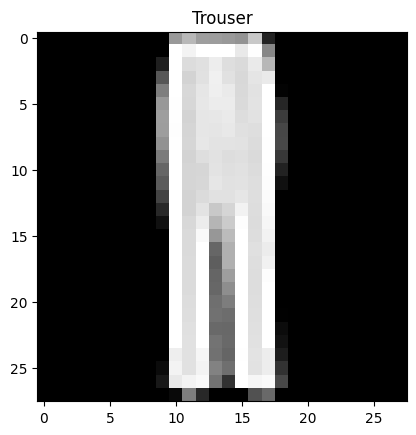

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(
    model=model_0,
    data=test_samples
)

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 5, 9, 7, 1])

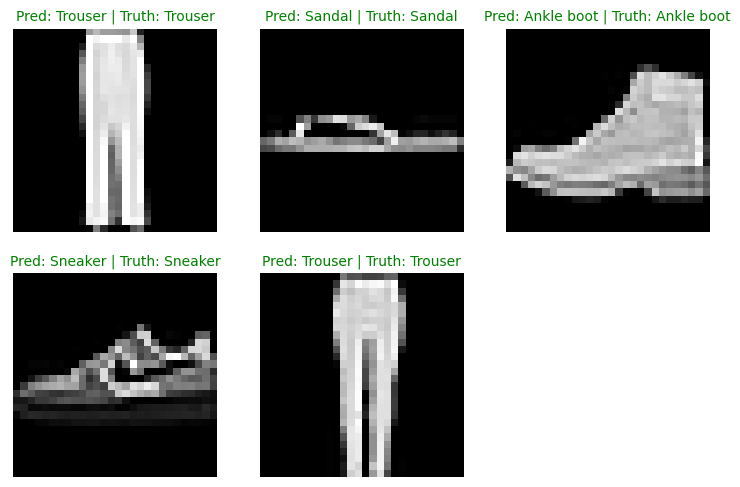

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_0.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):
    X, y = X.to(device), y.to(device)

    y_logits = model_0(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], device='cuda:0')

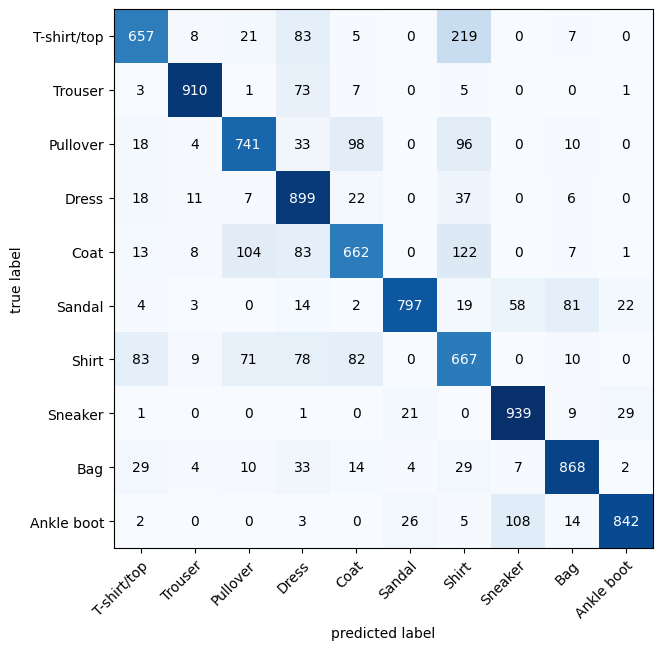

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor.cpu(), target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [ ]:
len(test_dataloader)*32

60000